# Testing Image Preprocessing Pipeline

In [1]:
from image_preprocessing import NormalizeImageChannels, BackgroundSubtraction, FlatFieldCorrection, SelectActiveChannel, TileImages

In [2]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np

## Zhao Lab - Preprocessing Pipeline
Using default parameters

* Output image scale is between 0 and 52428

(2304, 2304, 3)


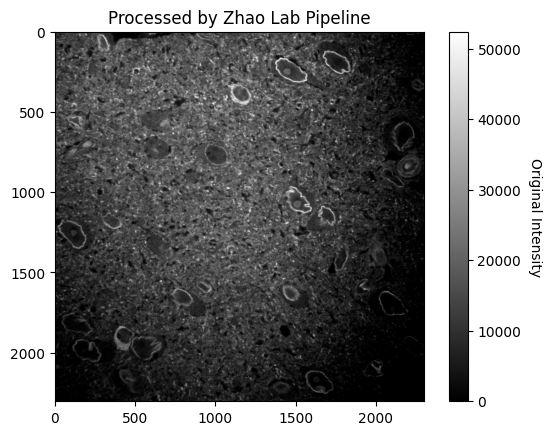

In [3]:
im2 = tiff.imread("./images/optimized_with_zhaolab_pipeline/2_RGB_Cy5 W1_optimized.ome.tif")

im2 = np.moveaxis(im2, 0, -1)
print(im2.shape)

im2_act, _ = SelectActiveChannel(im2)

im_plt = plt.imshow(im2_act, cmap="gray")
cbar0 = plt.colorbar(im_plt)
cbar0.set_label("Original Intensity", rotation=270, labelpad=15)
plt.title("Processed by Zhao Lab Pipeline")
plt.show()

In [4]:
print(im2.max(), im2.min())

52428 0


## Custom Preprocessing Pipeline

Currently working on this
* Selects the active color channel
* Scale pixels from 0 to 1
* Tile images

In [5]:
img = tiff.imread("./images/test_images/2_RGB_coomassie.tif")
print(img.shape)
print(img.ndim)
print(img.dtype)

(2304, 2304, 3)
3
uint8


Select active color channel, dims as (h, w, 1)

(2304, 2304, 1)


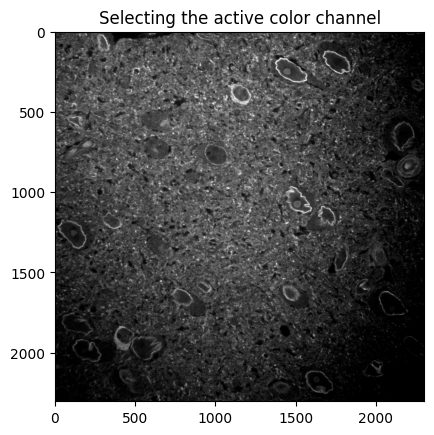

In [6]:
active_ch, _ = SelectActiveChannel(img)
print(active_ch.shape)
plt.imshow(active_ch, cmap='gray')
plt.title("Selecting the active color channel")
plt.show()

Background subtraction, dims as (h, w, 1)

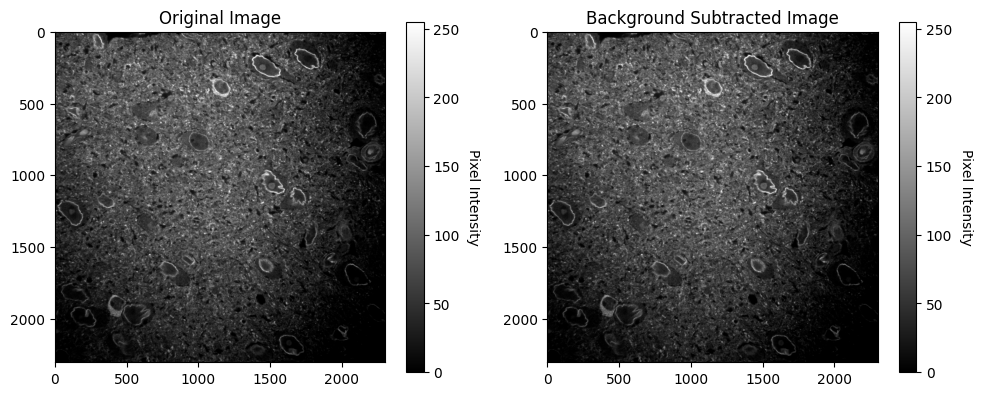

In [7]:
# test background subtraction
bg_subbed = BackgroundSubtraction(active_ch)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# --- Left: Original image ---
im0 = axes[0].imshow(active_ch, cmap='gray')
axes[0].set_title("Original Image")
cbar0 = fig.colorbar(im0, ax=axes[0])
cbar0.set_label("Pixel Intensity", rotation=270, labelpad=15)

# --- Right: Processed image ---
im1 = axes[1].imshow(bg_subbed, cmap='gray')
axes[1].set_title("Background Subtracted Image")
cbar1 = fig.colorbar(im1, ax=axes[1])
cbar1.set_label("Pixel Intensity", rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

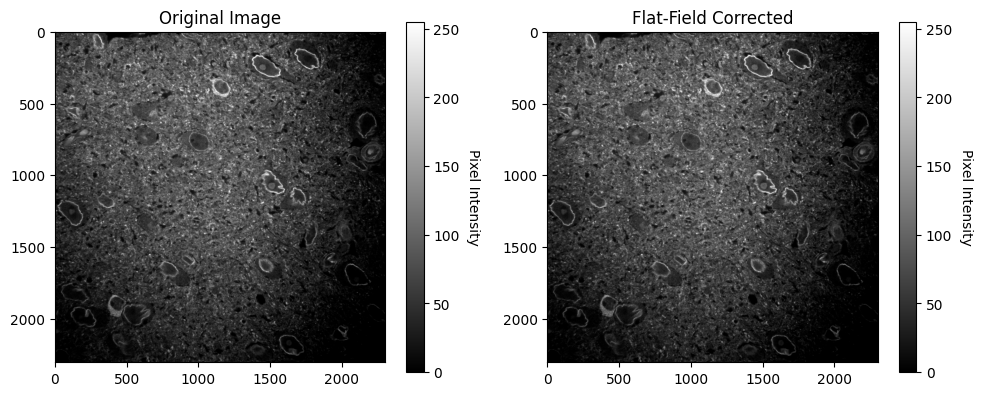

In [8]:
# test flat-field
ff_corr = FlatFieldCorrection(bg_subbed)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# --- Left: Original image ---
im0 = axes[0].imshow(bg_subbed, cmap='gray')
axes[0].set_title("Original Image")
cbar0 = fig.colorbar(im0, ax=axes[0])
cbar0.set_label("Pixel Intensity", rotation=270, labelpad=15)

# --- Right: Processed image ---
im1 = axes[1].imshow(ff_corr, cmap='gray')
axes[1].set_title("Flat-Field Corrected")
cbar1 = fig.colorbar(im1, ax=axes[1])
cbar1.set_label("Pixel Intensity", rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

In [9]:
print(ff_corr.min())
print(ff_corr.max())

0.0
255.0


In [10]:
# check tiling function
tiles = TileImages(active_ch)
print(print(len(tiles)))

9
None


In [11]:
tiles[1].max()

255.0

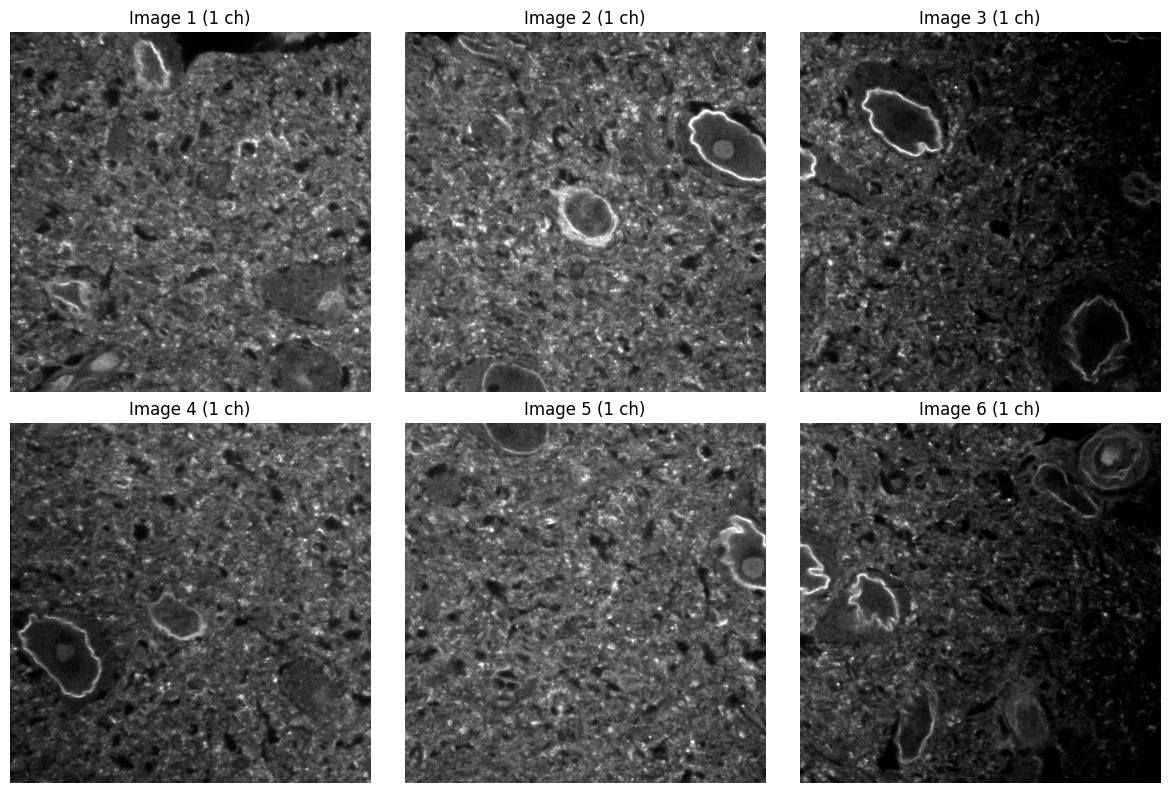

In [12]:
# plot the first 6 tiled images if 6
num_plots = len(tiles)

# plot the tiles
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

for i, (img, ax) in enumerate(zip(tiles, axes)):
    h, w, n = img.shape

    # Create RGB composite
    ax.imshow(tiles[i], cmap="gray")
    ax.set_title(f"Image {i+1} ({n} ch)")
    ax.axis("off")

# hide any unused subplots if list < 6
for j in range(num_plots, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

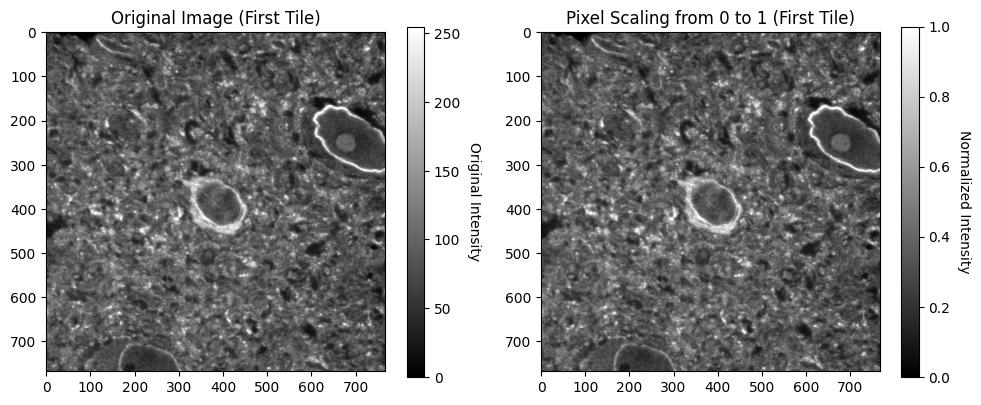

In [13]:
# test image normalization
norm_img = NormalizeImageChannels(tiles)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# --- Left: Original image ---
im0 = axes[0].imshow(tiles[1], cmap='gray')
axes[0].set_title("Original Image (First Tile)")
cbar0 = fig.colorbar(im0, ax=axes[0])
cbar0.set_label("Original Intensity", rotation=270, labelpad=15)

# --- Right: Normalized image ---
im1 = axes[1].imshow(norm_img[1], cmap='gray', vmin=0, vmax=1)
axes[1].set_title("Pixel Scaling from 0 to 1 (First Tile)")
cbar1 = fig.colorbar(im1, ax=axes[1])
cbar1.set_label("Normalized Intensity", rotation=270, labelpad=15)

plt.tight_layout()
plt.show()